# Clustering

* **Clustering**: type of unsupervised Machine Learning (ML) technique in which data is partitioned into similar groups (clusters) based on certain characteristics. Clustering is a way to group a set of data points in a way that similar data points are grouped together. Therefore, clustering algorithms look for similarities or dissimilarities among data points. Clustering is an unsupervised learning method so there is no label associated with data points. The algorithm tries to find the underlying structure of the data.

* **Clustering is not classification**: clustering methods do not predict a label.

* **Clusters**: groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. 

* **Dimensionality Reduction**: clustering reduces the dimensionality of the data set making it simpler to work with. 

* **Many clustering algorithms**: K-means is a popular algorithm due to its simplicity and fast convergence. it classifies data points into “K” clusters where each data point belongs to the nearest cluster mean. Other well known clustering algorithms are Optics clustering, DBSCAN, spectral clustering, hierarchical clustering, etc.
`scikit-learn` has an entire module sklearn.cluster that contains several clustering algorithms. `SciPy` has two clustering models scipy.cluster.vq (which does k-means) and scipy.cluster.hierarchy (which has a variety of hierarchical clustering algorithms).


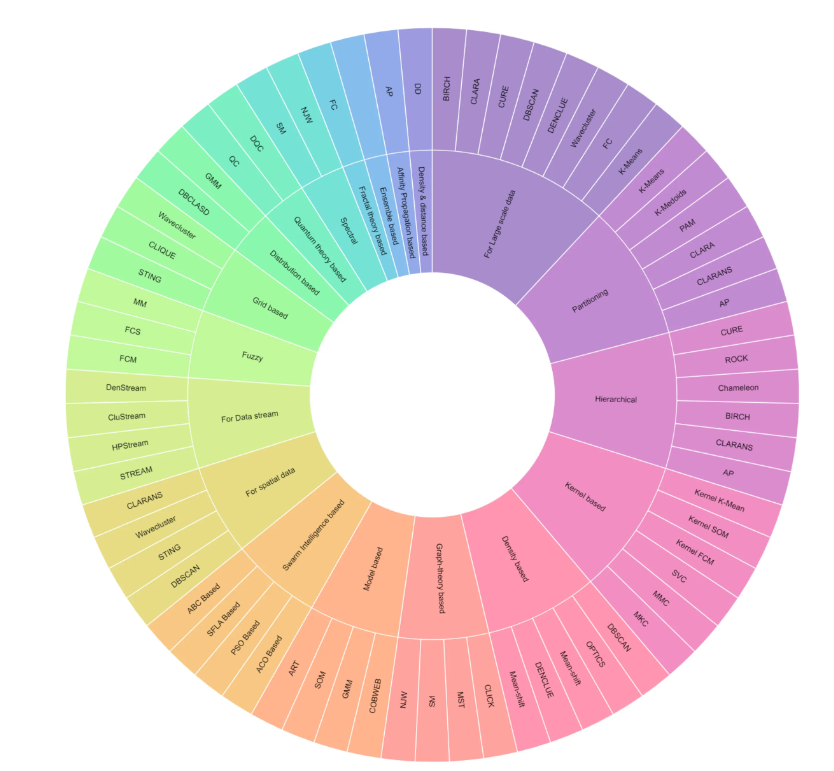

# K-means Clustering Algorithm

* K-means: unsupervised learning method for clustering data points. There are many families of clustering techniques, and you may be familiar with the most popular one: K-Means (which belongs to the family of centroid-based clustering). As a quick refresher, K-Means determines k centroids in the data and clusters points by assigning them to the nearest centroid. 

* K-Means is easy to understand and implement but it does not take care of outliers: all points are assigned to a cluster even if they do not belong in any. In the domain of anomaly detection, this causes problems as anomalous points will be assigned to the same cluster as “normal” data points. The anomalous points pull the cluster centroid towards them, making it harder to classify them as anomalous points. A better solution may be a density-based clustering technique like DBSCAN (density-based based clustering technique). DBSCAN works by identifying “dense” clusters of points, allowing it to learn clusters of arbitrary shape and identify outliers in the data.

* K-Means requires specifying the number of clusters beforehand, which can be a drawback. It works well for evenly sized, globular clusters but struggles with complex shapes.

,,,back to Kmeans...

* K-means algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster. What does "minimizing the variance in each cluster" mean?

* estimate the best value for K using the elbow method: then use K-means clustering to group the data points into clusters.

### How does it work?
Initially, each data point is randomly assigned to one of the K clusters.Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

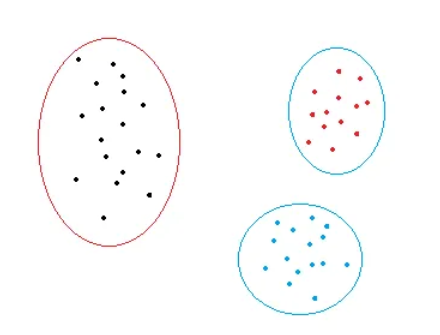

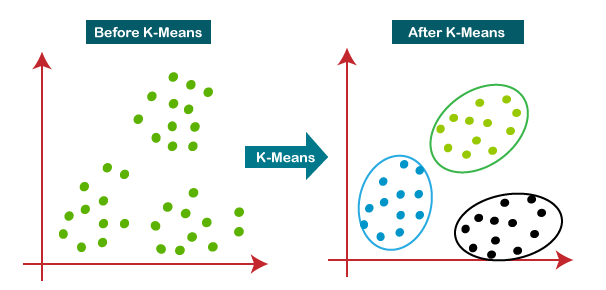


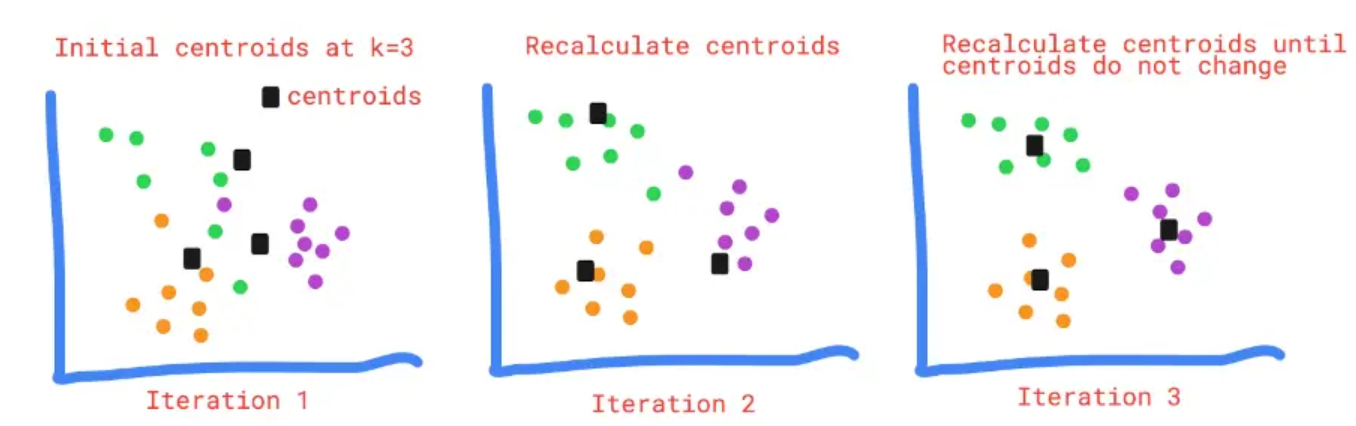

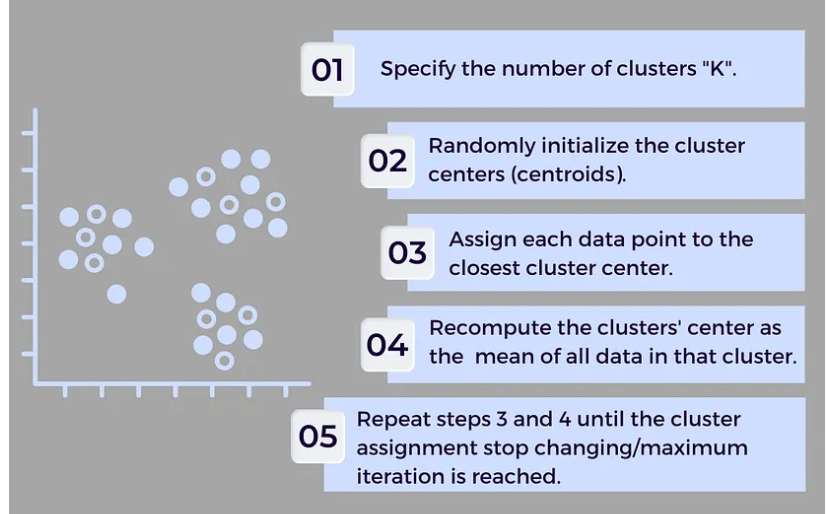

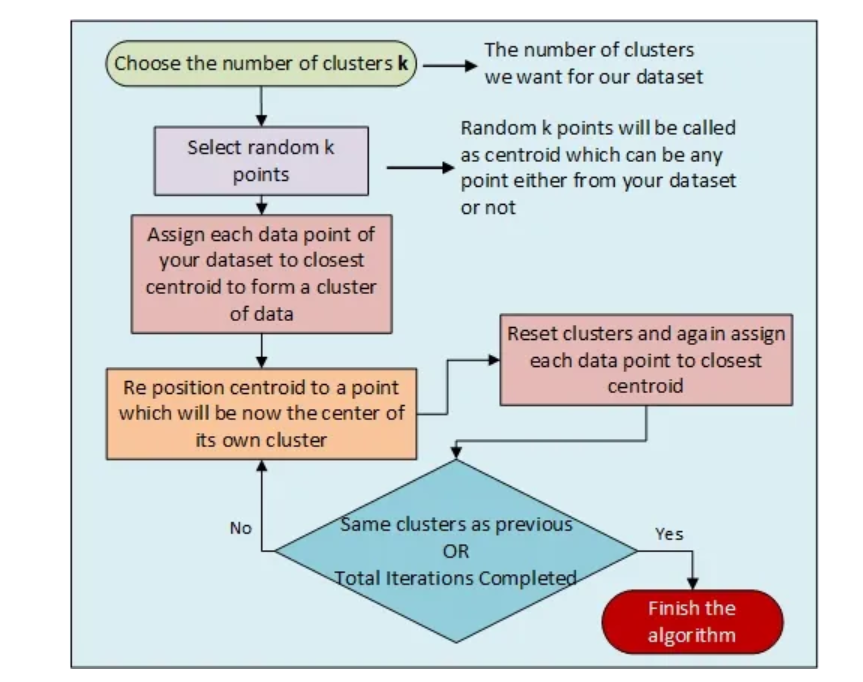

Initialize Centroids:

Randomly choose K data points from the dataset to be the initial centroids. K is the number of clusters you want to create.
Assign Data Points to Nearest Centroid:

For each data point in the dataset, calculate the distance to each centroid.
Assign the data point to the cluster whose centroid is the closest (usually using Euclidean distance).
Update Centroids:

Recalculate the centroids of the clusters by taking the mean of all the data points assigned to each cluster.
Repeat:

Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or after a predefined number of iterations.
Final Result:

The algorithm converges, and each data point is assigned to one of the K clusters.

   Age  Salary
0    4      21
1    5      19
2   10      24
3    4      17
4    3      16
5   11      25
6   14      24
7    6      22
8   10      21
9   12      21


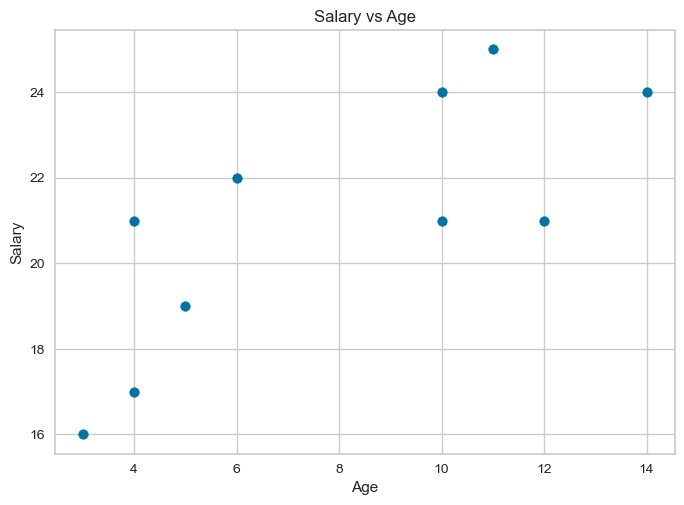

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Simulated dataset
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

df=pd.DataFrame({"Age":x, "Salary":y})

print(df.head(10))

#plotting the data points
plt.scatter(df["Age"], df["Salary"])
plt.xlabel("Age") 
plt.ylabel("Salary") 
plt.title('Salary vs Age') 
plt.grid(True) 
plt.show()

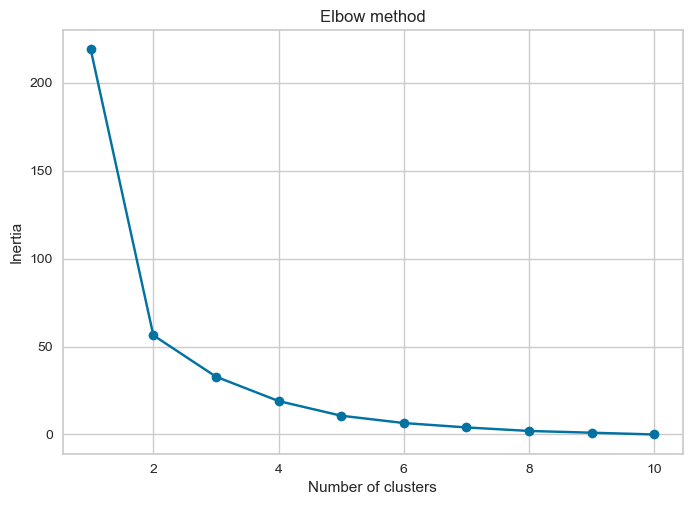

In [214]:
from sklearn.cluster import KMeans # import the class KMeans from sklearn.cluster

inertias = []   # each K-means clustering algorithm has its own inertia, also called weighted cluster sum of squares(wCSS) 

#Create a for loop to create various clustering algorithms with different number or clusters. What is the optimal number of clusters? We don't know that ahead of time...
# The best number of clussters is the one suggested by the elbow method...

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

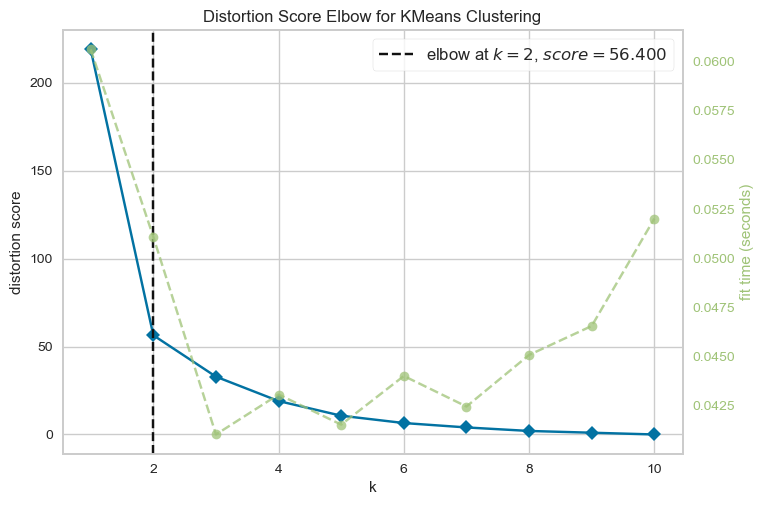

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [215]:
# Use Elbow method to find the optimal number of clusters

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11)).fit(df)
visualizer.show()

* The elbow graph, Inertia vs Number of clusters, tells us that 2 clusters may be the right choice:

In [216]:
# Create a K-means model with 2 clusters. We don't know the centroids of these clusters. 
# The centroids are points which represent the average position of the clusters, i.e. their center

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)  # fitting the k-means model to our data

# Once the model is fitted to the data, we can extract information from the fitted model. 
# For example, we can find out what the cluster centroids coordinates as well as the cluster label (cluster membership) assigned to each data point

# Cluster centroids coordinates:
centers=kmeans.cluster_centers_
#print(centers)  #Notice the output below. You have a 2D numpy array with a [4.4 19] representing the center of the first cluster and [11.4 23] being the center of the other cluster

# Cluster labels for each data point. For example, the point (4,21) gets assigned to cluster 1 (yellow cluster)
k_means_predictions =kmeans.labels_
print(k_means_predictions)   #output [1 1 0 1 1 0 0 1 0 0]

mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
mapped_predictions = [ mapping_dict[x] for x in k_means_predictions]
print(mapped_predictions)

[0 0 1 0 0 1 1 0 1 1]
['Cluster 1', 'Cluster 1', 'Cluster 2', 'Cluster 1', 'Cluster 1', 'Cluster 2', 'Cluster 2', 'Cluster 1', 'Cluster 2', 'Cluster 2']


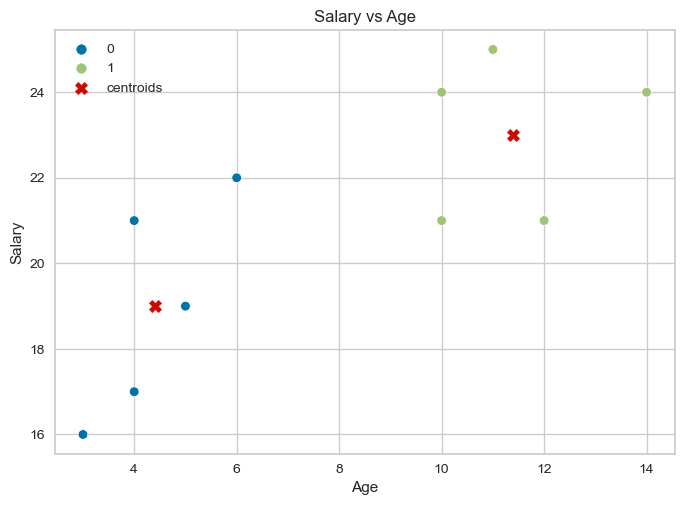

In [217]:
# map predictions to label
labels = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}

sns.scatterplot(data=df, x="Age", y="Salary", hue=kmeans.labels_,  #palette='deep' 
               )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.xlabel("Age") 
plt.ylabel("Salary") 
plt.title('Salary vs Age') 

plt.grid(True) 
plt.show()

In [218]:
df.iloc[0,:]  #kmeans.labels_

Age        4
Salary    21
Name: 0, dtype: int64

In [219]:
kmeans.labels_[0]

0

In [220]:
def membership(row):
    mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
    mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
    print(f"The data point in row {row} (Age={ df.iloc[row,0]} and Salary={df.iloc[row,1]}), belongs to {mapped_predictions[row]}")
     
membership(row=2)

The data point in row 2 (Age=10 and Salary=24), belongs to Cluster 2


In [221]:
kmeans.predict([[1, 10]])


array([0])

### How many data points are in each cluster?

In [222]:
from collections import Counter

# the Counter function from the collection module is a nifty tool. 
# Its input argument is an iterable (list, set, string, etc.). Its output is dictionary counting the number of items of each different type

# Example:
a= ["John", "John", "Mary", "Mary", "Mary", "Mary", "Fred"]
counter01 = Counter(a)
print(counter)

string= "aaadddsdsbbbbb"
counter02 = Counter(string)
print(counter02)


Counter({'Mary': 4, 'John': 2, 'Fred': 1})
Counter({'b': 5, 'd': 4, 'a': 3, 's': 2})


* Let's apply the `Counter()` function to our Kmeans problem:

In [223]:
Counter(kmeans.labels_)
# output Counter({2: 50, 0: 50, 3: 50, 1: 50}). This means that 5 data points were assigned to cluster 0 and 5 data points to cluster 1.

Counter({0: 5, 1: 5})

## KMeans Hyperparameters

* Hyperparameters are parameters that the user sets to create the model.

`n_clusters`: important parameter defininf the number of clusters to form (default=8).

`init`: defines the method initialization to use (default=’k-means++’). k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.

## After Fitting the K-means Model:

`cluster_centers_`: Location of the centroids for each cluster. The data point in a cluster will be close to the centroid of that cluster. ex: if we have 5 clusters, there will be 5 centroids each one having a location.

`labels_`: gives predicted class labels (cluster) for each data point.

`inertia_`: gives within-cluster sum of squares WCSS). This number is total of the within-cluster sum of squares for all clusters.

`n_iter_`: number of iterations that K-means algorithm runs to get a minimum within-cluster sum of squares


In [224]:
kmeans.labels_

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [225]:
kmeans.n_iter_

2

In [226]:
kmeans.cluster_centers_

array([[ 4.4, 19. ],
       [11.4, 23. ]])

In [227]:
kmeans.inertia_

56.4

## K-means Limitations
* As k-means is a clustering method (not classification), the accuracy should not be evaluated. This is because we do not train the model with labelled data.

* In K-means clustering, the number of clusters to form from the data must be provided. If the dataset is well-separated, it would be easy to identify the optimal number of clusters using the elbow method. However, if the data is not well-separated, it is difficult to find the optimal number of clusters.

* K-means clustering is not applicable to the categorical data. With categorical data, it is better to use K-medoids (Partition Around Medoids-PAM) clustering method. In K-medoids, the prototype is medoid (most representative data point for a cluster).

* K-means clustering is sensitive to outliers. DBSCAN clustering is an alternative method for clustering datasets with noise/outliers.

* K-means clustering works well with spherical-shaped clusters of similar sizes. If there are arbitrary-shaped clusters, K-means may not work well. DBSCAN clustering works better for arbitrary-shaped clusters. K-Means (and also Hierarchical Clustering) fails in creating clusters of arbitrary shapes.

* K-means can produce empty clusters (no points assigned to the cluster) depending on the initialization method and the value of K. 

In [229]:
kmeans.cluster_centers_

array([[ 4.4, 19. ],
       [11.4, 23. ]])

# DBSCAN Clustering Algorithm

* DBSCAN: Density-Based Spatial Clustering of Applications with Noise. Most well-known density-based clustering algorithm. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

* Density-based clustering algorithms are very effienct at finding high-density regions and outliers. It is very important to detect outliers for some task, e.g. anomaly detection.

* Main idea behind DBSCAN: a point belongs to a cluster if it is close to many points from that cluster. 

* DBSCAN assumption: clusters are dense regions in space separated by regions of lower density. DBSCAN groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points: DBSCAN clustering is robust to outliers. 

* DBSCAN does not require the number of clusters to be specified beforehand (unlike K-Means).

### DBSCAN Parameters
* DBSCAN requires only two parameters: `epsilon` and `minPoints`. 

     a) `Epsilon`: radius of the circle to be created around each data point to check the density.
     
     b) `minPoints` is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

* In higher dimensions (many variables involved): the circle becomes a hypersphere, epsilon becomes the radius of that hypersphere, and minPoints is the minimum number of data points required inside that hypersphere.

* DBSCAN creates a circle of radius `epsilon` around every data point and classifies the point as either:

    a) Core point
    
    b) Border point
    
    c) Noise point (aka outlier) 

A data point is a Core point if the circle around it contains at least `minPoints` number of points. 

A data point is a Border point if the circle contains less than `minPoints` number of points.

A data point is an outlier (noise) if the circle contains NO other data points. Noise points (known as outliers) are points that are neither core points nor border points. These points could be interpreted as anomalies. They are assigned the cluster label -1 by the DBSCAN algorithm.

* For locating data points in space, DBSCAN uses Euclidean distance (other methods can also be used.


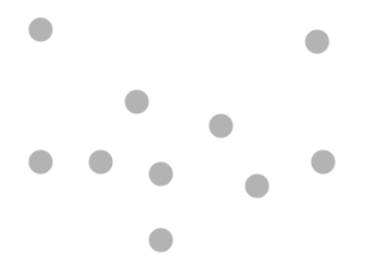    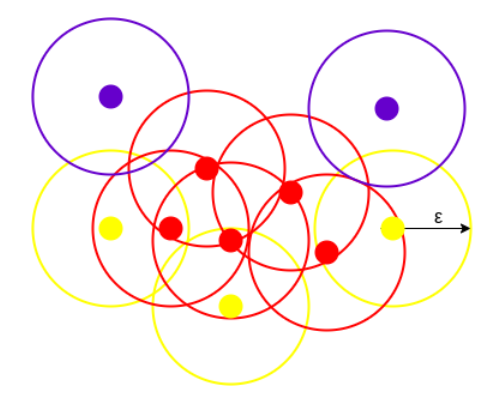

## Example 01: DBSCAN

* Generate some artificial data points using the `make_blob` function from `sklearn`

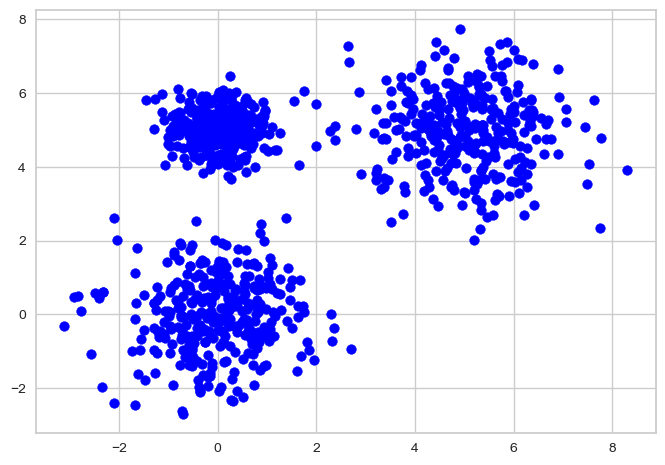

In [230]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generation of nested dummy data
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:,0], X[:,1], color='blue')
plt.show()

* Apply DVSCAN to the dataset specifing epsilon (0.5) and the minimum number of samples (5):

In [231]:
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# the number of clusters found by DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")
# Number of clusters found by DBSCAN: 3

Number of clusters found by DBSCAN: 5


* Plotting the DSCAN results. Notice the 3 clusters. The grey data points are classified as outliers.

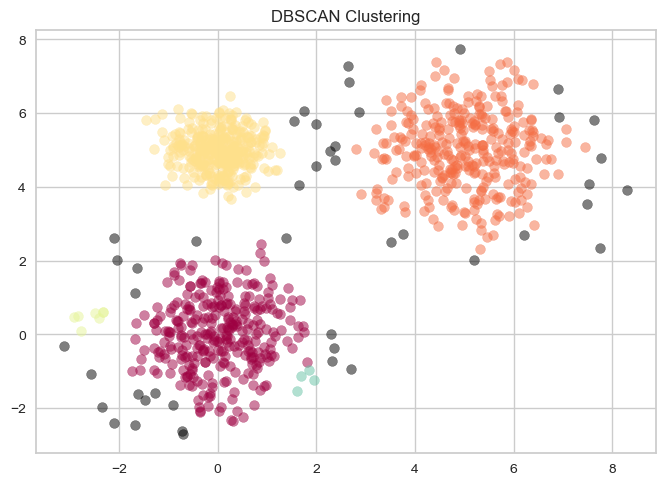

In [232]:
import numpy as np

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.show()

In [233]:
# attributes of the dbscan object
#print("Indices of core samples: ", dbscan.core_sample_indices_)
#print("Copy of each core sample found by training: ", dbscan.components_)
#print("Labels: ", dbscan.labels_)
#print("Number of features seen during fit: ", dbscan.n_features_in_)

## Example 02: DBSCAN

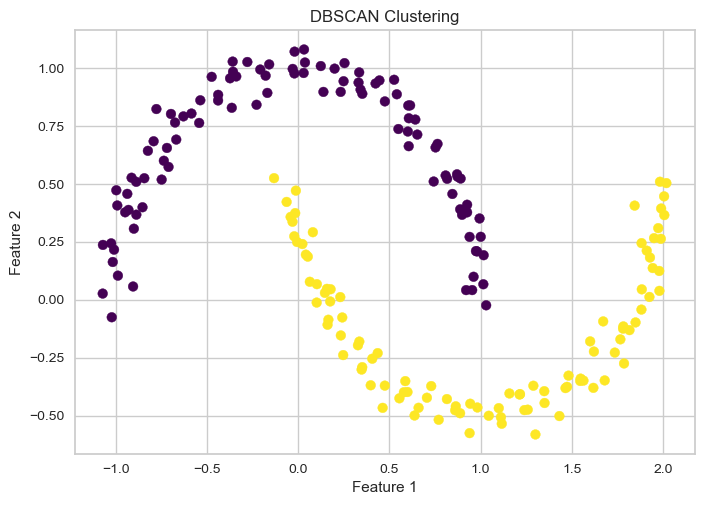

In [234]:
# import the required libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate a moons-shaped dataset
n_samples = 200
X, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=0)# Perform DBSCAN clustering

# DBSCAN algorithm
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)# Plot the data points and their cluster assignments

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Example 03: K-means vs DBSCAN 

In [235]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 

X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

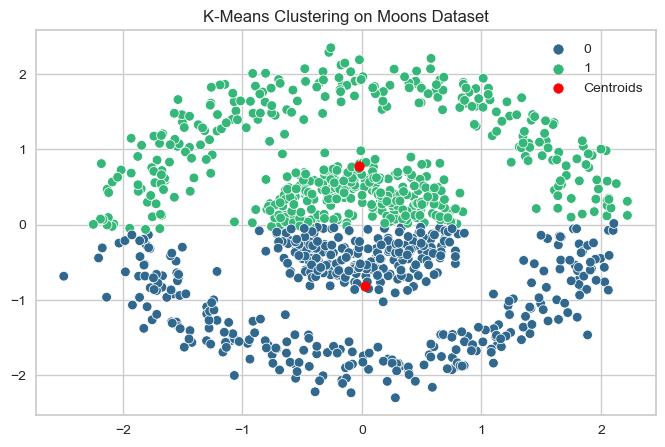

In [236]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels
labels_kmeans = kmeans.predict(X)

# Visualize the K-Means clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', label='Centroids')
plt.title('K-Means Clustering on Moons Dataset')
plt.legend()
plt.show()

* Apply DBSCAN to thee same dataset and compare to the K-means results

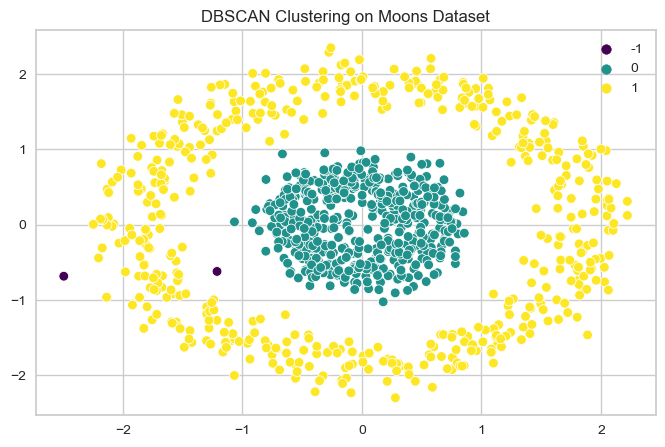

In [237]:
# Import necessary libraries
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model and predict the cluster labels
labels_dbscan = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()

## Example 04: K-means vs DBSCAN 

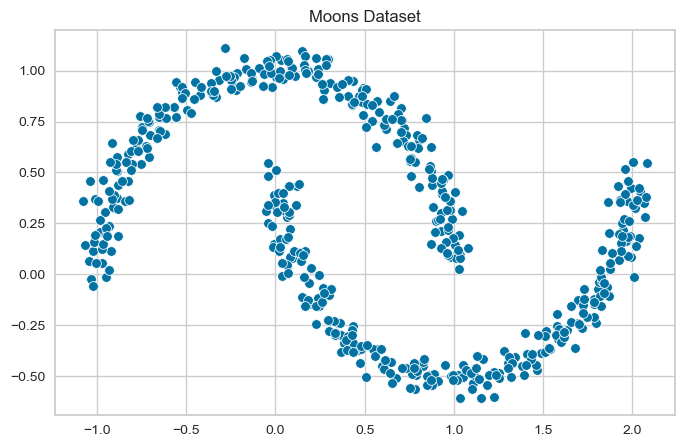

In [238]:
# Import necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the moon dataset with noise
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.title('Moons Dataset')
plt.show()

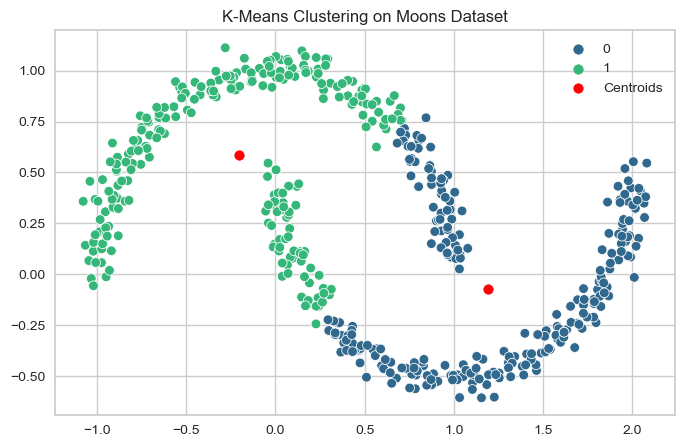

In [239]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Define the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster labels
labels_kmeans = kmeans.predict(X)

# Visualize the K-Means clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_kmeans, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', label='Centroids')
plt.title('K-Means Clustering on Moons Dataset')
plt.legend()
plt.show()

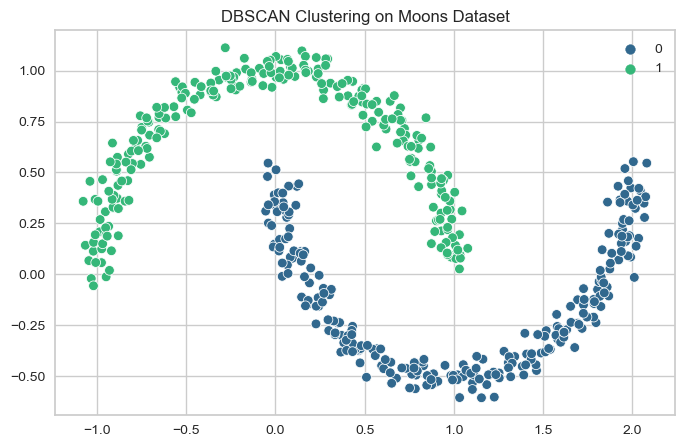

In [240]:
# Import necessary libraries
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model and predict the cluster labels
labels_dbscan = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Clustering on Moons Dataset')
plt.show()